# [Tensorflow](https://www.tensorflow.org/) basics

In this tutorial we are going to classify images from the notMNIST dataset . The goal is to automatically detect the letter based on the image in the dataset.

In [35]:
import tensorflow as tf

In [5]:
# Create TensorFlow object called hello_constant
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


## Tensor

In TensorFlow data is not stored as strings, floats or strings. These values are encapsulated in an object called a [tensors](https://en.wikipedia.org/wiki/Tensor). In the case of `hello_constant = tf.constant('Hello World!')`, `hello_constant` is a 0-dimensional string tensor, but tensors come in a variety of sizes as shown below:

In [6]:
# A is a 0-dimensional int32 tensor
A = tf.constant(1234)

# B is a 1-dimensional in32 tensor
B = tf.constant([123, 456, 789])

# C is a 2-dimensional int 32 tensor
C = tf.constant([ [123, 456, 789,], [222,333,444] ])

The tensor returned by `tf.constant()` is called a constant tensor, because the value of the tensor never changes.

## Session

TensorFlow’s api is built around the idea of a computational graph. The previous TensorFlow code can be turned into a graph:

![TensorFlow_Session](./figures/session.png)

A "TensorFlow Session", as shown above, is an environment for running a graph. The session is in charge of allocating the operations to GPU(s) and/or CPU(s), including remote machines.

In [7]:
with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)

The code has already created the tensor, `hello_constant`, from the previous lines. The next step is to evaluate the tensor in a session.

The code creates a session instance, `sess`, using `tf.Session`. The `sess.run()` function then evaluates the tensor and returns the results.

## Input

If we want to use a non-constant we use [`tf.placeholder()`](https://www.tensorflow.org/api_docs/python/tf/placeholder) and `feed_dict`. Next we go over the basics of feeding data into TensorFlow.

### tf.placeholder()

We use [`tf.placeholder()`](https://www.tensorflow.org/api_docs/python/tf/placeholder) to use it as placeholder for arbitrary data input. Thus allowing TensorFlow to take in different datasets with different parameters.

[`tf.placeholder()`](https://www.tensorflow.org/api_docs/python/tf/placeholder) returns a tensor that gets its value from data passed to the tf.session.run() function, allowing you to set the input right before the session runs.

### Session's feed_dict

In [8]:
x = tf.placeholder(tf.string)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Hello World'})

Use the `feed_dict` parameter in [`tf.session.run()`](https://www.tensorflow.org/api_docs/python/tf/Session#run) to set the placeholder tensor. The above example shows the tensor `x` being set to the string `"Hello, world"`. It's also possible to set more than one tensor using `feed_dict` as shown below.

In [9]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Test String', y: 123, z: 45.67})

**Note:** If the data passed to the `feed_dict` doesn’t match the tensor type and can’t be cast into the tensor type, we get the error `“ValueError: invalid literal for`...”.

## TensorFlow Math

After getting the input we are going to use it by applying basic math functions - add, subtract, multiply, and divide - with tensors. (There's many more math functions, see in the [documentation](https://www.tensorflow.org/api_docs/python/math_ops/).)

### Addition

In [10]:
x = tf.add(5, 2)  # 7

The [`tf.add()`](https://www.tensorflow.org/api_guides/python/math_ops) function does exactly what you expect it to do. It takes in two numbers, two tensors, or one of each, and returns their sum as a tensor.

### Subtraction and Multiplication

Here’s an example with subtraction and multiplication.

In [11]:
x = tf.subtract(10, 4) # 6
y = tf.multiply(2, 5)  # 10

The x tensor will evaluate to `6`, because `10 - 4 = 6`. The `y` tensor will evaluate to `10`, because `2 * 5 = 10`.

### Converting types

It may be necessary to convert between types to make certain operators work together. For example, if we'd try the following, it would fail with an exception:

In [12]:
#tf.subtract(tf.constant(2.0),tf.constant(1))
# Fails with ValueError: Tensor conversion requested dtype float32 
# for Tensor with dtype int32:

That's because the constant `1` is an integer but the constant `2.0` is a floating point value and subtract expects them to match.

In cases like these, you can either make sure our data is all of the same type, or we can cast a value to another type. In this case, converting the `2.0` to an integer before subtracting, like so, will give the correct result:

In [13]:
tf.subtract(tf.cast(tf.constant(2.0), tf.int32), tf.constant(1))   # 1

<tf.Tensor 'Sub_1:0' shape=() dtype=int32>

In [14]:
x = tf.constant(10)
y = tf.constant(2)
z = tf.subtract(tf.cast(tf.divide(x,y), tf.int32),tf.constant(1))

# Note:TensorFlow has multiple ways to divide.
#   tf.divide(x,y) uses Python 3 division semantics and will return a float here
#          It would be the best choice if all the other values had been floats
#   tf.div(x,y) uses Python 2 division semantics and will return an integer here
#          TensorFlow documentation suggests we should prefer tf.divide
#   tf.floordiv(x,y) will do floating point division and then round down to the nearest
#          integer (but the documentation says it may still represent
#          its result as a floating point value)
#   tf.cast(tf.divide(x,y), tf.int32)
#          This lets us do floating point division and then cast it to an integer
#          to match the 1 passed to subtract


# TODO: Print z from a session
with tf.Session() as sess:
    output = sess.run(z)
    print(output)

4


### Recap

We did the following:
- Ran operations in [`tf.Session`](https://www.tensorflow.org/api_docs/python/tf/Session).
- Created a constant tensor with [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant).
- Used [`tf.placeholder()`](https://www.tensorflow.org/api_docs/python/tf/placeholder) and `feed_dict` to get input.
- Applied the [`tf.add()`](https://www.tensorflow.org/api_docs/python/tf/add), [`tf.subtract()`](https://www.tensorflow.org/api_docs/python/tf/subtract), [`tf.multiply()`](https://www.tensorflow.org/api_docs/python/tf/multiply), and [`tf.divide()`](https://www.tensorflow.org/api_docs/python/tf/divide) functions using numeric data.
- Learned about casting between types with [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast)

These are the basics of TensorFlow. Next we learn about one of the most popular applications of neural networks - classification.

## Supervised Classification

https://en.wikipedia.org/wiki/Statistical_classification

## Training a Logistic Classifier

A logistic classifier takes an input e.g. the pixels of an image $X$ and applies a linear funciton to them to generate its predictions.

$$
WX + b = y
$$

$W$ are the weights and $b$ is the bias term. Output vector $y$ reflects the class of the input. This should be a probability vector where we want the probability of the correct class to be very close to one and the probability to every other class to be close to zero.
The way to turn scores in to probabilities is to use a softmax function:

$$
S(y_i) = \frac{e^{y_i}}{\sum_j e^{y_j}}
$$

This function denoted by $S$ can turn any score into proper probabilities.
Proper probabilities sum to one and they will be larger when the scores are large and small when the scores are comparatively smaller. Scores in the terms of logistic regression, are also often called logits.

By training our network we are going to try to find the values for the weights and bias which are good at performing correct predictions.



## Linear functions in TensorFlow

The most common operation in neural networks is calculating the linear combination of inputs, weights, and biases. As a reminder, we can write the output of the linear operation as

$$
y = xW + b
$$

Here, $W$ is a matrix of the weights connecting two layers. The output $y$, the input $x$, and the biases $b$ are all vectors.

### Weights and Bias in TensorFlow

The goal of training a neural network is to modify weights and biases to best predict the labels. In order to use weights and bias, we'll need a Tensor that can be modified. This leaves out [`tf.placeholder()`](https://www.tensorflow.org/api_docs/python/tf/placeholder) and [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant), since those Tensors can't be modified. This is where [`tf.Variable`](https://www.tensorflow.org/api_docs/python/tf/Variable) class comes in.

#### tf.Variable()

In [15]:
x = tf.Variable(5)

The [`tf.Variable`](https://www.tensorflow.org/api_docs/python/tf/Variable) class creates a tensor with an initial value that can be modified, much like a normal Python variable. This tensor stores its state in the session, so we must initialize the state of the tensor manually. We'll use the [`tf.global_variables_initializer()`](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer) function to initialize the state of all the Variable tensors.

##### Initialization

In [16]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

The [`tf.global_variables_initializer()`](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer) call returns an operation that will initialize all TensorFlow variables from the graph. We call the operation using a session to initialize all the variables as shown above. Using the [`tf.Variable`](https://www.tensorflow.org/api_docs/python/tf/Variable) class allows us to change the weights and bias, but an initial value needs to be chosen.

Initializing the weights with random numbers from a normal distribution is good practice. Randomizing the weights helps the model from becoming stuck in the same place every time we train it. We'll see more about this in the next section, when we study gradient descent.

Similarly, choosing weights from a normal distribution prevents any one weight from overwhelming other weights. We'll use the [`tf.truncated_normal()`](https://www.tensorflow.org/api_docs/python/tf/truncated_normal) function to generate random numbers from a normal distribution.

#### tf.truncated_normal()

In [17]:
n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))

The [`tf.truncated_normal()`](https://www.tensorflow.org/api_docs/python/tf/truncated_normal) function returns a tensor with random values from a normal distribution whose magnitude is no more than 2 standard deviations from the mean.

Since the weights are already helping prevent the model from getting stuck, you don't need to randomize the bias. Let's use the simplest solution, setting the bias to 0.

#### tf.truncated_normal()

In [18]:
n_labels = 5
bias = tf.Variable(tf.zeros(n_labels))

The [`tf.zeros()`](https://www.tensorflow.org/api_docs/python/tf/zeros) function returns a tensor with all zeros.

### Linear Classifier Example

![mnist](./figures/mnist-012.png)
A subset of the MNIST dataset

We'll be classifying the handwritten numbers `0`, `1`, and `2` from the MNIST dataset using TensorFlow. The above is a small sample of the data we'll be training on. Notice how some of the `1`s are written with a [serif](https://en.wikipedia.org/wiki/Serif) at the top and at different angles. The similarities and differences will play a part in shaping the weights of the model.

![weights](./figures/weights-0-1-2.png)
Left: Weights for labeling 0. Middle: Weights for labeling 1. Right: Weights for labeling 2.

The images above are trained weights for each label (`0`, `1`, and `2`). The weights display the unique properties of each digit they have found. In the following we will train our own weights using the MNIST dataset.

In [20]:
def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # Return weights
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # Return biases
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)

In [108]:
from tensorflow.examples.tutorials.mnist import input_data


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('./mnist', one_hot=True)

    # In order to make this run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

# get init operation that is used to initialize all TensorFlow variables
init = tf.global_variables_initializer()

with tf.Session() as session:
    # initialize all TensorFlow variables
    session.run(init)

    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # We'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # We'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # We'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Loss: 2.879290819168091


## TensorFlow Softmax

In the Intro to TFLearn we used the softmax function to calculate class probabilities as output from the network. The softmax function squashes it's inputs, typically called logits or logit scores, to be between `0` and `1` and also normalizes the outputs such that they all sum to `1`. This means the output of the softmax function is equivalent to a categorical probability distribution. It's the perfect function to use as the output activation for a network predicting multiple classes.

![](./figures/softmax-input-output.png)
Example of the softmax function at work.

### TensorFlow Softmax
We're using TensorFlow to build neural networks and, appropriately, there's a function for calculating softmax.

In [23]:
x = tf.nn.softmax([2.0, 1.0, 0.2])

 [`tf.nn.softmax()`](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) implements the softmax function. It takes in logits and returns softmax activations.

In [24]:
def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)

    softmax = tf.nn.softmax(logits)

    with tf.Session() as sess:
        output = sess.run(softmax, feed_dict={logits: logit_data})

    return output

In [25]:
run()

array([ 0.65900117,  0.24243298,  0.09856589], dtype=float32)

## One-Hot Encoding

We need a way to represent our labels mathematically. We want the probability for the correct class to be close to `1` and the probability for all the other classes close to `0`.
Using [one-hot encoding](https://en.wikipedia.org/wiki/One-hot), each label will be represented by vector, that is as long as there are classes and it has a value `1.0` for the correct class and `0.0` every where else.

### One-Hot Encoding With Scikit-Learn

Transforming labels into one-hot encoded vectors is pretty simple with scikit-learn using LabelBinarizer.

In [27]:
import numpy as np
from sklearn import preprocessing

# Example labels
labels = np.array([1,5,3,2,1,4,2,1,3])

# Create the encoder
lb = preprocessing.LabelBinarizer()

# Here the encoder finds the classes and assigns one-hot vectors 
lb.fit(labels)

# And finally, transform the labels into one-hot encoded vectors
lb.transform(labels)

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

## Cross Entropy in TensorFlow

In the Intro to TFLearn lesson we discussed using cross entropy as the cost function for classification with one-hot encoded labels. Again, TensorFlow has a function to do the cross entropy calculations for us.

![cross_entropy](./figures/cross-entropy-diagram.png)
Cross entropy loss function

To create a cross entropy function in TensorFlow, we'll need to use two new functions:

- [`tf.reduce_sum()`](https://www.tensorflow.org/api_docs/python/tf/reduce_sum)
- [`tf.log()`](https://www.tensorflow.org/api_docs/python/tf/log)

### Reduce Sum

In [31]:
x = tf.reduce_sum([1, 2, 3, 4, 5])  # 15

The [`tf.reduce_sum()`](https://www.tensorflow.org/api_docs/python/tf/reduce_sum) function takes an array of numbers and sums them together.

### Natural Log

In [40]:
x = tf.log(100.0)  # 4.60517

This function does exactly what you would expect it to do. [`tf.log()`](https://www.tensorflow.org/api_docs/python/tf/log) takes the natural log of a number.

In [41]:
softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

# Calculate cross entropy
cross_entropy = -tf.reduce_sum(tf.mul(one_hot, tf.log(softmax)))

# Print cross entropy from session
with tf.Session() as session:
    output = session.run(cross_entropy, feed_dict={one_hot: one_hot_data, softmax: softmax_data})
    print(output)

0.356675


## Minimizing Cross Entropy

Having all the pieces of the puzzle, the quesion is how we are going to find the weights $w$ and the biases $b$ that will get our classifier to do what we want it to do. That is, have low distance for the correct class but have a high distance for the incorrect class. One thing we can do is to measure that distance averaged over the entire training set for all the inputs and the labels that we have available. That is called the training loss 

$$
L = \frac{1}{N} \sum_i = D(S(W x_i + b), y_i)
$$

This loss which is the average cross entropy over our entire training set is one humongous function. Every example in our training set gets multiplied by this one big matrix $W$ and then they get all added up in one big sum.
We want all the distances to be small with, which would mean we are doing a good job at classifying every example in the training data. So we want the loss to be small. The loss is a function of the weights and the biases. So we are going to minimize that function.

We can turn the machine learning problem into a numerical optimization problem and use gradient descent to find the minimium loss.

## Transition into Practical Aspects of Learning

In the next section we will see how we can use tensorFlow tools to compute the derivatives and see the pros and cons about gradient descent. But for now we assume that we have the optimizer as a black box that we can simply use. 
There are still two last practical things that stand in the way before we can train our model:

1. How do we fill image pixels to this classifier?
2. Where do we initialize the optimization?

## Numerical Stability

When we do numerical computations, we always have to worry a bit about calculating values that are too large or too small. In particular, adding very small values, to a very large value can introduce a lot of errors.

In [42]:
a = 1000000000
for i in range(1000000):
    a = a + 1e-6
print(a - 1000000000)

0.95367431640625


If we add 1e-6 a million times to the value one million and after that subract again one million we should get 1.0 according to math. But the code result is 0.95 which is a big difference. 

If we replace the one billion with just one we see that the error becomes very tiny.

In [43]:
a = 1
for i in range(1000000):
    a = a + 1e-6
print(a - 1)

0.9999999999177334


### Normalized Inputs and Initial Weights

Because of these numerical issues we want the values involved in the loss function to never get too big or too small.
One good guiding prinicple is that we want our values to always have zero mean and equal variance whenever possible.
On top of the numerical issues there are also a very good mathematical reasons to keep values we compute roughly around a mean of zero and equal variance when we are doing optimization (well conditioned). A badly conditioned problem means that the optimizer has to a lot of searching to go and find a good solution. A well conditioned problem makes it a lot easier for the optimizer to do its job.

![normalization](./figures/normalization.jpeg)

If we are dealing with images it is simple. We can take the pixel values of the images. They are typically between 0 and 255 and simply subtract 128 and divide by 128. This does not change the content of the image but it makes it much easier for the optmization to proceed numerically. 

We also want our weights and biases to be initialized at good enough starting point for the gradient descent to proceed. There are a lot of schemes to fidn good initialization values but we are going to focus on a simple general method. We draw the weights randomly from a gaussian distribution with mean zero and standard deviation sigma. The sigma value determines the order of magnitude of our outputs at the intital point of our optimizaiton. Because of the softmax on top of it, the order of magnitude also determines the peakiniess of our initial probability distribution. A large sigma will mean that our distribuiton have large peaks and going to be very opinionated. A small sigma means the our distribuiton is very uncertain about things. It is usually better to begin with an uncertain distriibution, and let the optimization become more confident as training progresses. So we use small sigma to begin with.

Now that we have every thing we traing our classifier. We got our trainign data which is normalized to have zero mean and unit variance. We multiply it by a large matrix which is initialized with random weights. We apply the softmax, then the cross entropy loss function and finally calculate the average of this loss over the entire training data.

Then our optimization package computes the derivative of this loss with respect to the weights and to the biases and takes a step back into the direction opposite to that derivative. After that we start all over again. We repeat the process until we reach a minimum of the loss function.

## Measuring Performance

Now that we know how to train our model there is another important part:
We have seen that we have a training set as well as a validation set and a test set.
This has to do with measuring with how well we are doing. Measuring performance is subtle.
A classifier should not memorize the training set because it would fail to generalize to new input examples.
This is not just a theoretical problem. Every classifier that we will build will try to memorize the training set. It is our job to help it to generalize to new data instead. Therefor we use a small test data that the clasifier did not see before, to test the current performance of the classifier. The problem is that training a classifier is usually trail and error. It is a cycle, we train a classifier, measure its performance and try another classifier and measure again, and again, ... we tweak the model and explore the different parameters and measure and finally we think that we have the perfect classifier and want to deploy our system and we get totally new data where we score our performance.

The reason that it will probably not score that well, is that while tweaking our classifier we used our test set and therefore our classifier has seen our test data indirectly. Although just a bit of the test set after each little change in parameters, but still the test data bleeds into our training data which is what we must avoid!

There are many ways to deal with this. The simplest one is splitting the data in three sets:

- test set. Which we will never look at until we are done tweaking our parameters. After we made our final decision we wil use it to measure our classifiers performance.
- training set.
- validation set is used to measure our actual error and maybe the validation set will blend into our training set but that is ok as long as we have our test set that we can rely on is data that our classifier has not seen before.

## Optimizing a Logistic Classifier

Training logistic regression using gradient descent is great. For one thing we are directly optimizing the error measure that we care about. That is why in practice a lot of machine learning research is about designing the right loss funciton to optimize. 
As we have expirienced our model has problems. The biggest problem is that it is very difficult to scale.

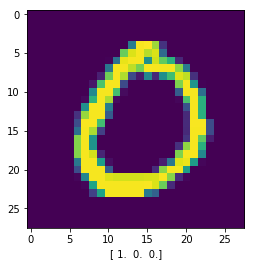

In [114]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

idx = 80
digit_feature_vec = train_features[idx]
digit_label = train_labels[idx]

image = digit_feature_vec.reshape((28,28))
plt.imshow(image)
plt.xlabel(digit_label)

In [117]:
with tf.Session() as session:
    # initialize all TensorFlow variables
    session.run(init)

    # Softmax
    prediction = tf.nn.softmax(logits)
    
    output = session.run(prediction, feed_dict={features: [digit_feature_vec]})
    print(output)

[[ 0.46339864  0.5286476   0.00795373]]


## Stochastic Gradient Descent

Assuming the loss function needs n floating points operations to compute. The contained gradient calculation three times as much and we consider all training data we get a lot of computations for only one single gradient descent step. Usually a gradient descent step can take 10 or 100 of times to find the minimum.

To avoid this computations, we are taking a shortcut by computing an estimate of it. Although this estimate will be very bad it works quite well becasue we are going to improve it.

We are going to compute the average loss for a very small random fraciton of the training set. It is important though to pick a random training data sample each time otherwise this method won't work.

1. The first step is to take a small random sample of the training data
2. Then we compute the loss
3. After that we have found an estimate of the gradients and we pretend that this is the correct gradient.

Although this won't be the correct directions we compensate for this by repeating those three steps many times.
This will lead to very small steps but is much more efficent than doing regular gradient descent.

This method is called stochastic gradient descent and scales well. Both with data and model size.
And we want both: Big data and big models.

SGD is nice and scalable but it is fundamentally a bad optimizer that happens to be the only one that is fast enough it comes with a lot of issues in practice.

## Momentum And Learning Rate Decay

To help SGD we already saw some tricks:

- zero mean
- small and equal variance

These are very important for SGD. 
It is also important to initialize with random weights that have very small variance and zero mean too.

Here are some other tips to consider:

1. **Momentum:**

Remember that at each step we are taking a very small step in a random direciton. But on aggregate those steps take us towards the minimum of the loss. We can take advantage of the knowledge that we accumuluated from pervious steps about where we should be headed. A cheap way to do that is to keep a running average of the gradient and to use that average instead of the current direction of the current batch of the data. This momentum technique works very well and often leads to faster convergence.

2. **Learning Rate Decay:**

Remember when replacing gradient descent with SGD we learnt that we were going to take smaller noisier steps towards our objective. How small shoudl that step be is a whole area of research as well.
One thing that is always the case however, is that it is always beneficial to make that step smaller and smaller as we train our model. Some like to applay and exponential decay to the learning rate. Some like to make it smaller every time the loss reaches a plateau. There are lots of ways to go about it but lowering it over time is the key thing to remember.

## Parameter Hyperspace

Learning rate tuning can be very strange. A higher learning rate does not neccessary mean that we learn more or faster. Often we can take a lower learning rate and get to a lower loss faster.

### SGD Blackmagic

SGD has many hyperparameters:

- Initial learing rate
- Learning rate decay
- Momentum
- Batch size
- Weight initialization

It is not that hard to choose appropriate values but one thing to remember when things wont work:

**Always try to lower the learning rate first.**

There are lots of good solutions for small models but sadly non that is completely satisfactory so far for the very large models that we really care about. 

One approach that makes things a little bit easier is **ADAGRAD** which is a modification of SGD. ADAGRAD does momentum and learning rate decay implicitly for us. Using ADAGRAD makes learning often less sensitive to hyperparamters.


## Mini batch

In this section, we'll go over what mini-batching is and how to apply it in TensorFlow.

Mini-batching is a technique for training on subsets of the dataset instead of all the data at one time. This provides the ability to train a model, even if a computer lacks the memory to store the entire dataset.

Mini-batching is computationally inefficient, since we can't calculate the loss simultaneously across all samples. However, this is a small price to pay in order to be able to run the model at all.

It's also quite useful combined with SGD. The idea is to randomly shuffle the data at the start of each epoch, then create the mini-batches. For each mini-batch, we train the network weights with gradient descent. Since these batches are random, we're performing SGD with each batch.

Let's look at the MNIST dataset with weights and a bias to see if our machine can handle it.

In [121]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('./mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [137]:
print("train_features.shape", train_features.shape)
print("train_labels.shape", train_labels.shape)

train_features.shape (55000, 784)
train_labels.shape (55000, 10)


Calculating the memory size of train_features, train_labels, weights, and bias in bytes. Ignore memory for overhead, just calculate the memory required for the stored data.

A float32 requires 32 bit which are 4 bytes of memory, see also this [link](https://en.wikipedia.org/wiki/Single-precision_floating-point_format).

train_features Shape: (55000, 784) Type: float32

55000*784*4 = 172480000

train_labels Shape: (55000, 10) Type: float32

55000*10*4 = 2200000

weights Shape: (784, 10) Type: float32

784*10*4 = 31360

bias Shape: (10,) Type: float32

10*4 = 40

The total memory space required for the inputs, weights and bias is around 174 megabytes, which isn't that much memory. We could train this whole dataset on most CPUs and GPUs.

But larger datasets that we'll use in the future measured in gigabytes or more. It's possible to purchase more memory, but it's expensive. A Titan X GPU with 12 GB of memory costs over $1,000.

Instead, in order to run large models on our machines, we'll see how to use mini-batching.

Let's look at how we implement mini-batching in TensorFlow.

## TensorFlow Mini-batching



In order to use mini-batching, we must first divide your data into batches.

Unfortunately, it's sometimes impossible to divide the data into batches of exactly equal size. For example, imagine we'd like to create batches of 128 samples each from a dataset of 1000 samples. Since 128 does not evenly divide into 1000, we'd wind up with 7 batches of 128 samples, and 1 batch of 104 samples. (7*128 + 1*104 = 1000)

In that case, the size of the batches would vary, so we need to take advantage of TensorFlow's [`tf.placeholder()`](https://www.tensorflow.org/api_docs/python/tf/placeholder) function to receive the varying batch sizes.

Continuing the example, if each sample had `n_input = 784` features and `n_classes = 10` possible labels, the dimensions for features would be `[None, n_input]` and labels would be `[None, n_classes]`.

In [138]:
# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

What does None do here?

The None dimension is a placeholder for the batch size. At runtime, TensorFlow will accept any batch size greater than `0`.

Going back to our earlier example, this setup allows you to feed features and labels into the model as either the batches of `128` samples or the single batch of `104` samples.

Use the parameters below, how many batches are there, and what is the last batch size?

features is (50000, 400)

labels is (50000, 10)

batch_size is 128

How many batches are there?
391 (390*128 + 1)

What is the last batch size?
80

Now we implement the `batches function` to batch `features` and `labels`. The function returns each batch with a maximum size of `batch_size`. To help you with the quiz, look at the following example output of a working batches function.

In [142]:
# 4 Samples of features
example_features = [
    ['F11','F12','F13','F14'],
    ['F21','F22','F23','F24'],
    ['F31','F32','F33','F34'],
    ['F41','F42','F43','F44']]
# 4 Samples of labels
example_labels = [
    ['L11','L12'],
    ['L21','L22'],
    ['L31','L32'],
    ['L41','L42']]



`example_batches = batches(3, example_features, example_labels)`

The `example_batches` variable would be the following:

In [140]:
[
    # 2 batches:
    #   First is a batch of size 3.
    #   Second is a batch of size 1
    [
        # First Batch is size 3
        [
            # 3 samples of features.
            # There are 4 features per sample.
            ['F11', 'F12', 'F13', 'F14'],
            ['F21', 'F22', 'F23', 'F24'],
            ['F31', 'F32', 'F33', 'F34']
        ], [
            # 3 samples of labels.
            # There are 2 labels per sample.
            ['L11', 'L12'],
            ['L21', 'L22'],
            ['L31', 'L32']
        ]
    ], [
        # Second Batch is size 1.
        # Since batch size is 3, there is only one sample left from the 4 samples.
        [
            # 1 sample of features.
            ['F41', 'F42', 'F43', 'F44']
        ], [
            # 1 sample of labels.
            ['L41', 'L42']
        ]
    ]
]

[[[['F11', 'F12', 'F13', 'F14'],
   ['F21', 'F22', 'F23', 'F24'],
   ['F31', 'F32', 'F33', 'F34']],
  [['L11', 'L12'], ['L21', 'L22'], ['L31', 'L32']]],
 [[['F41', 'F42', 'F43', 'F44']], [['L41', 'L42']]]]

In [141]:
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    # Implement batching
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches

In [145]:
example_batches = batches(3, example_features, example_labels)
example_batches

[[[['F11', 'F12', 'F13', 'F14'],
   ['F21', 'F22', 'F23', 'F24'],
   ['F31', 'F32', 'F33', 'F34']],
  [['L11', 'L12'], ['L21', 'L22'], ['L31', 'L32']]],
 [[['F41', 'F42', 'F43', 'F44']], [['L41', 'L42']]]]

Let's use mini-batching to feed batches of MNIST features and labels into a linear model.

Set the batch size and run the optimizer over all the batches with the batches function. The recommended batch size is `128`.

In [148]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('./mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Set batch size
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # Train optimizer on all batches
    for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
        sess.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Test Accuracy: 0.10029999911785126


The accuracy is low, but you probably know that you could train on the dataset more than once. You can train a model using the dataset multiple times. We'll go over this subject in the next section where we talk about "epochs".

## Epochs

An epoch is a single forward and backward pass of the whole dataset. This is used to increase the accuracy of the model without requiring more data. This section will cover epochs in TensorFlow and how to choose the right number of epochs.

The following TensorFlow code trains a model using 10 epochs.

In [152]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np


def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        cost,
        feed_dict={features: last_features, labels: last_labels})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features: valid_features, labels: valid_labels})
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('./mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
valid_features = mnist.validation.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
valid_labels = mnist.validation.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
learning_rate = tf.placeholder(tf.float32)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

batch_size = 128
epochs = 80
learn_rate = 0.001

train_batches = batches(batch_size, train_features, train_labels)

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch_i in range(epochs):

        # Loop over all batches
        for batch_features, batch_labels in train_batches:
            train_feed_dict = {
                features: batch_features,
                labels: batch_labels,
                learning_rate: learn_rate}
            sess.run(optimizer, feed_dict=train_feed_dict)

        # Print cost and validation accuracy of an epoch
        print_epoch_stats(epoch_i, sess, batch_features, batch_labels)

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Epoch: 0    - Cost: 10.7     Valid Accuracy: 0.0814
Epoch: 1    - Cost: 9.98     Valid Accuracy: 0.091
Epoch: 2    - Cost: 9.32     Valid Accuracy: 0.101
Epoch: 3    - Cost: 8.76     Valid Accuracy: 0.114
Epoch: 4    - Cost: 8.29     Valid Accuracy: 0.131
Epoch: 5    - Cost: 7.87     Valid Accuracy: 0.151
Epoch: 6    - Cost: 7.49     Valid Accuracy: 0.168
Epoch: 7    - Cost: 7.15     Valid Accuracy: 0.186
Epoch: 8    - Cost: 6.83     Valid Accuracy: 0.201
Epoch: 9    - Cost: 6.54     Valid Accuracy: 0.219
Epoch: 10   - Cost: 6.26     Valid Accuracy: 0.241
Epoch: 11   - Cost: 6.0      Valid Accuracy: 0.257
Epoch: 12   - Cost: 5.76     Valid Accuracy: 0.273
Epoch: 13   - Cost: 5.54     Valid Accuracy: 0.29 
Epoch: 14   - Cost: 5.33     Valid Accuracy: 0.303
Epoch: 15   - Cost: 5.13     Valid Accuracy: 0.32 
E

```
Epoch: 0    - Cost: 15.3     Valid Accuracy: 0.12 
Epoch: 1    - Cost: 13.7     Valid Accuracy: 0.135
Epoch: 2    - Cost: 12.6     Valid Accuracy: 0.149
Epoch: 3    - Cost: 11.9     Valid Accuracy: 0.16 
Epoch: 4    - Cost: 11.2     Valid Accuracy: 0.168
Epoch: 5    - Cost: 10.7     Valid Accuracy: 0.18 
Epoch: 6    - Cost: 10.2     Valid Accuracy: 0.19 
Epoch: 7    - Cost: 9.73     Valid Accuracy: 0.205
Epoch: 8    - Cost: 9.31     Valid Accuracy: 0.214
Epoch: 9    - Cost: 8.93     Valid Accuracy: 0.227
Test Accuracy: 0.23890000581741333
```

Each epoch attempts to move to a lower cost, leading to better accuracy.

This model continues to improve accuracy up to Epoch 9. Let's increase the number of epochs to 100.

```
Epoch: 0    - Cost: 11.2     Valid Accuracy: 0.0864
Epoch: 1    - Cost: 10.3     Valid Accuracy: 0.0854
Epoch: 2    - Cost: 9.65     Valid Accuracy: 0.0898
Epoch: 3    - Cost: 9.22     Valid Accuracy: 0.0988
Epoch: 4    - Cost: 8.87     Valid Accuracy: 0.112
Epoch: 5    - Cost: 8.56     Valid Accuracy: 0.131
Epoch: 6    - Cost: 8.26     Valid Accuracy: 0.152
Epoch: 7    - Cost: 7.98     Valid Accuracy: 0.167
Epoch: 8    - Cost: 7.7      Valid Accuracy: 0.186
...
Epoch: 20   - Cost: 5.37     Valid Accuracy: 0.375
Epoch: 21   - Cost: 5.24     Valid Accuracy: 0.39 
Epoch: 22   - Cost: 5.11     Valid Accuracy: 0.399
Epoch: 23   - Cost: 4.99     Valid Accuracy: 0.41 
Epoch: 24   - Cost: 4.88     Valid Accuracy: 0.419

...
Epoch: 83   - Cost: 2.17     Valid Accuracy: 0.694
Epoch: 84   - Cost: 2.15     Valid Accuracy: 0.696
Epoch: 85   - Cost: 2.13     Valid Accuracy: 0.697
Epoch: 86   - Cost: 2.11     Valid Accuracy: 0.699
Epoch: 87   - Cost: 2.09     Valid Accuracy: 0.701
Epoch: 88   - Cost: 2.08     Valid Accuracy: 0.702
Epoch: 89   - Cost: 2.06     Valid Accuracy: 0.703
...
Epoch: 97   - Cost: 1.94     Valid Accuracy: 0.718
Epoch: 98   - Cost: 1.92     Valid Accuracy: 0.719
Epoch: 99   - Cost: 1.91     Valid Accuracy: 0.721
Test Accuracy: 0.7197999954223633
```

From looking at the output above, you can see the model doesn't increase the validation accuracy after epoch 80. Let's see what happens when we increase the learning rate.

`learn_rate = 0.1`

```
Epoch: 0    - Cost: 1.48     Valid Accuracy: 0.713
Epoch: 1    - Cost: 1.04     Valid Accuracy: 0.795
Epoch: 2    - Cost: 0.89     Valid Accuracy: 0.825
Epoch: 3    - Cost: 0.809    Valid Accuracy: 0.841
Epoch: 4    - Cost: 0.756    Valid Accuracy: 0.853
Epoch: 5    - Cost: 0.719    Valid Accuracy: 0.861
...
Epoch: 21   - Cost: 0.514    Valid Accuracy: 0.899
Epoch: 22   - Cost: 0.507    Valid Accuracy: 0.899
Epoch: 23   - Cost: 0.5      Valid Accuracy: 0.9  
Epoch: 24   - Cost: 0.494    Valid Accuracy: 0.901
Epoch: 25   - Cost: 0.487    Valid Accuracy: 0.901
Epoch: 26   - Cost: 0.482    Valid Accuracy: 0.901
Epoch: 27   - Cost: 0.476    Valid Accuracy: 0.902
Epoch: 28   - Cost: 0.471    Valid Accuracy: 0.902
...
Epoch: 50   - Cost: 0.392    Valid Accuracy: 0.91 
Epoch: 51   - Cost: 0.389    Valid Accuracy: 0.91 
Epoch: 52   - Cost: 0.387    Valid Accuracy: 0.91 
Epoch: 53   - Cost: 0.384    Valid Accuracy: 0.91 
Epoch: 54   - Cost: 0.382    Valid Accuracy: 0.91 
Epoch: 55   - Cost: 0.38     Valid Accuracy: 0.91 
Epoch: 56   - Cost: 0.378    Valid Accuracy: 0.911
Epoch: 57   - Cost: 0.375    Valid Accuracy: 0.911
Epoch: 58   - Cost: 0.373    Valid Accuracy: 0.911
Epoch: 59   - Cost: 0.371    Valid Accuracy: 0.911
Epoch: 60   - Cost: 0.369    Valid Accuracy: 0.912
Epoch: 61   - Cost: 0.367    Valid Accuracy: 0.912
Epoch: 62   - Cost: 0.365    Valid Accuracy: 0.912
Epoch: 63   - Cost: 0.363    Valid Accuracy: 0.912
Epoch: 64   - Cost: 0.361    Valid Accuracy: 0.912
Epoch: 65   - Cost: 0.359    Valid Accuracy: 0.913
...
Epoch: 88   - Cost: 0.322    Valid Accuracy: 0.915
Epoch: 89   - Cost: 0.321    Valid Accuracy: 0.915
Epoch: 90   - Cost: 0.32     Valid Accuracy: 0.915
Epoch: 91   - Cost: 0.318    Valid Accuracy: 0.915
Epoch: 92   - Cost: 0.317    Valid Accuracy: 0.915
Epoch: 93   - Cost: 0.316    Valid Accuracy: 0.915
Epoch: 94   - Cost: 0.314    Valid Accuracy: 0.915
Epoch: 95   - Cost: 0.313    Valid Accuracy: 0.915
Epoch: 96   - Cost: 0.312    Valid Accuracy: 0.915
Epoch: 97   - Cost: 0.311    Valid Accuracy: 0.915
Epoch: 98   - Cost: 0.309    Valid Accuracy: 0.915
Epoch: 99   - Cost: 0.308    Valid Accuracy: 0.915
Test Accuracy: 0.9133999943733215
```

Looks like the learning rate was increased too much. The final accuracy was lower, and it stopped improving earlier. Let's stick with the previous learning rate, but change the number of epochs to 80.

```
Epoch: 0    - Cost: 10.7     Valid Accuracy: 0.0814
Epoch: 1    - Cost: 9.98     Valid Accuracy: 0.091
Epoch: 2    - Cost: 9.32     Valid Accuracy: 0.101
Epoch: 3    - Cost: 8.76     Valid Accuracy: 0.114
Epoch: 4    - Cost: 8.29     Valid Accuracy: 0.131
Epoch: 5    - Cost: 7.87     Valid Accuracy: 0.151
Epoch: 6    - Cost: 7.49     Valid Accuracy: 0.168
Epoch: 7    - Cost: 7.15     Valid Accuracy: 0.186
Epoch: 8    - Cost: 6.83     Valid Accuracy: 0.201
...
Epoch: 35   - Cost: 3.02     Valid Accuracy: 0.521
Epoch: 36   - Cost: 2.96     Valid Accuracy: 0.527
Epoch: 37   - Cost: 2.91     Valid Accuracy: 0.535
Epoch: 38   - Cost: 2.86     Valid Accuracy: 0.54 
...
Epoch: 70   - Cost: 1.9      Valid Accuracy: 0.673
Epoch: 71   - Cost: 1.88     Valid Accuracy: 0.674
Epoch: 72   - Cost: 1.86     Valid Accuracy: 0.676
Epoch: 73   - Cost: 1.85     Valid Accuracy: 0.678
Epoch: 74   - Cost: 1.83     Valid Accuracy: 0.68 
Epoch: 75   - Cost: 1.81     Valid Accuracy: 0.682
Epoch: 76   - Cost: 1.8      Valid Accuracy: 0.684
Epoch: 77   - Cost: 1.78     Valid Accuracy: 0.687
Epoch: 78   - Cost: 1.77     Valid Accuracy: 0.69 
Epoch: 79   - Cost: 1.75     Valid Accuracy: 0.692
Test Accuracy: 0.6929000020027161
```

The accuracy only reached 0.86, but that could be because the learning rate was too high. Lowering the learning rate would require more epochs, but could ultimately achieve better accuracy.